In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
craigslist = pd.read_csv("craiglist_clean.csv")

In [3]:
craigslist.head()

,fuel,odometer,paint color,price,transmission,year,brand,model,variant
0,gas,111111,unknown,200000,manual,1970,plymouth,road,runner
1,gas,90000,white,20000,automatic,2002,lexus,sc430,unknown
2,gas,160600,grey,11500,automatic,2013,honda,civic,sedan
3,gas,199000,white,3300,automatic,1995,ford,van,unknown
4,gas,107292,silver,7000,automatic,2012,vw,jetta,unknown


In [4]:
craigslist.shape

(20729, 9)

In [5]:
craigslist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20729 entries, 0 to 20728
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fuel          20729 non-null  object
 1   odometer      20729 non-null  int64 
 2   paint color   20729 non-null  object
 3   price         20729 non-null  int64 
 4   transmission  20729 non-null  object
 5   year          20729 non-null  int64 
 6   brand         20727 non-null  object
 7   model         20699 non-null  object
 8   variant       20729 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.4+ MB


In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cols = ['fuel', 'paint color', 'transmission', 'brand', 'model', 'variant']

craigslist[cols] = craigslist[cols].apply(LabelEncoder().fit_transform)

In [7]:
craigslist.head()

,fuel,odometer,paint color,price,transmission,year,brand,model,variant
0,2,111111,10,200000,1,1970,402,1256,1637
1,2,90000,11,20000,0,2002,328,1331,2086
2,2,160600,5,11500,0,2013,279,468,1720
3,2,199000,11,3300,0,1995,233,1551,2086
4,2,107292,9,7000,0,2012,514,920,2086


In [8]:
from sklearn.model_selection import train_test_split

y = craigslist.price
X = craigslist.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14510, 8)
(14510,)
(6219, 8)
(6219,)


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_train = poly_reg.fit_transform(X_train)
X_test =  poly_reg.fit_transform(X_test)

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
y_pred_polreg = pol_reg.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Polynomial Regression:')
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_polreg),2))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_polreg),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_polreg)),2))
print('r2: ', round(r2_score(y_test,y_pred_polreg), 2))

Polynomial Regression:
MAE: 10743.6
MSE: 16659098454.9
RMSE: 129070.13
r2:  0.01


Feature: 0, Score: -10685.98338
Feature: 1, Score: -0.02841
Feature: 2, Score: 113.84373
Feature: 3, Score: 5618.76777
Feature: 4, Score: 119.58215
Feature: 5, Score: 11.25465
Feature: 6, Score: 0.90783
Feature: 7, Score: -3.33991


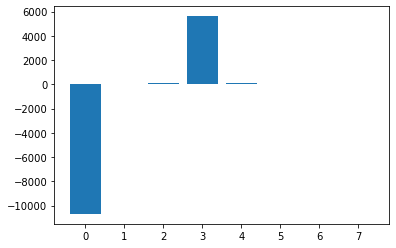

In [16]:
from matplotlib import pyplot


# fit the model
pol_reg.fit(X, y)
# get importance
importance = pol_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()